# Cellphone Coverage

conda env list

conda activate geoenv

In [2]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
from shapely.geometry import Point
import requests, zipfile, io

In [3]:
rawDataRelativePath = './dataSources'
targetFile = 'Canada_cell_towers.csv'
pathAndFile = "%s/%s" % (rawDataRelativePath, targetFile)
cellTowers = gpd.read_file(pathAndFile)
cellTowers = cellTowers.rename(columns={'field_1': 'radio',
                                        'field_2': 'Mobile Country Code',
                                        'field_3': 'net',
                                        'field_4': 'area',
                                        'field_5': 'cell_Id',
                                        'field_6': 'unit',
                                        'field_7': 'lon',
                                        'field_8': 'lat',
                                        'field_9': 'range (m)',
                                        'field_10': 'samples',
                                        'field_11': 'changeable',
                                        'field_12': 'created',
                                        'field_13': 'updated',
                                        'field_14': 'averageSignal',
                                        })
cellTowers = gpd.GeoDataFrame(cellTowers, geometry=gpd.points_from_xy(cellTowers['lon'], cellTowers['lat']), crs="EPSG:4326")
cellTowers.to_crs("EPSG:4326", inplace=True)
cellTowers = cellTowers.drop(columns=['lon', 'lat'])
# cellTowers.count()
# cellTowers.head()

In [4]:
canadaRectangular = pd.DataFrame(
    {
        "Country": ["Canada"],
        "Coordinates": [
            "POLYGON ((-80 52, -55 52, -55 45, -80 45, -80 52))"
        ],
    }
)
canadaRectangular["Coordinates"] = gpd.GeoSeries.from_wkt(canadaRectangular["Coordinates"])
canadaRectangular = gpd.GeoDataFrame(canadaRectangular, geometry="Coordinates", crs="EPSG:4269")
canadaRectangular.to_crs("EPSG:4326", inplace=True)
# canadaRectangular.plot()

<Axes: >

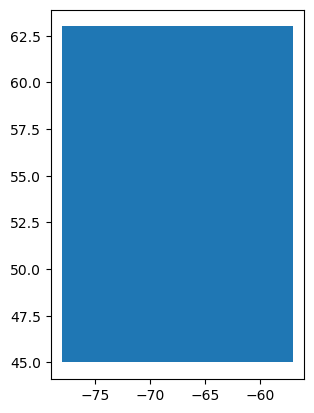

In [5]:
rectangleQuebec = pd.DataFrame(
    {
        "Province": ["Quebec"],
        "Coordinates": [
            "POLYGON ((-78 63, -57 63, -57 45, -78 45, -78 63))"
        ],
    }
)
rectangleQuebec["Coordinates"] = gpd.GeoSeries.from_wkt(rectangleQuebec["Coordinates"])
rectangleQuebec = gpd.GeoDataFrame(rectangleQuebec, geometry="Coordinates", crs="EPSG:4269")
rectangleQuebec.to_crs("EPSG:4326", inplace=True)
rectangleQuebec.plot()

In [6]:
cellTowersCanada = gpd.sjoin(cellTowers, rectangleQuebec)
cellTowersCanada = cellTowersCanada.drop(columns=['Province'])
cellTowersCanada = cellTowersCanada.drop(columns=['index_right'])
# cellTowersCanada.count()
cellTowersCanada.head()

,radio,Mobile Country Code,net,area,cell_Id,unit,range (m),samples,changeable,created,updated,averageSignal,geometry
67,GSM,302,720,2000,2632,0,772,109,1,1345498434,1694357547,0,POINT (-73.58940 45.51350)
102,GSM,302,720,2000,1081,0,1000,97,1,1345546469,1694365071,0,POINT (-73.56920 45.50790)
109,GSM,302,720,2000,1083,0,643,121,1,1345641229,1694363891,0,POINT (-73.57160 45.50810)
113,GSM,302,720,3000,11862,0,18830,27,1,1355692561,1727196905,0,POINT (-70.89290 47.03770)
114,UMTS,302,720,50000,466357,298,28471,159,1,1357153544,1712184842,0,POINT (-70.84370 46.96950)


In [7]:
cellTowersCanada.to_csv('dataOutput/cellTowersQuebec.csv', index=False)